# [MidExam]-[MATH6149016 ; MATH6149049 ]-[MachineLearning]

**Thursday, April 28, 2022.**

**Student Name**  : Felicia Ferren  
**Student ID**    : 2440013071     
**Video Link**    : 
- https://binusianorg-my.sharepoint.com/personal/felicia_ferren_binus_ac_id/_layouts/15/guestaccess.aspx?share=Ef_ESZG43NdIp7Gc7PZ9g2MBx9gqTIINZKjo7Ou3tS9_PA&e=uX2zgo (onedrive)
- https://youtu.be/xoa3Cu9nkhU (youtube)

***Task:***   
**You are required to build `the best` multiclass classifier for the penguins dataset that achieves over 95% accuracy over the test set.**   
Your objectives are to:     
o Conduct a thorough exploratory data analysis (using graphs, statistical test, etc. and a verbal analysis)   
o Build `multiple potentially suitable classification models` (at least 2 different machine learning models).    
`For example:` By using different attributes or proportion for training and testing set or machine learning algorithms for each model or other schemas.    
o Choose what you assume to be the `"best"` model from these models for a final submission   

### 1. Data Description

The data used in this mid-exam called `Penguins` dataset, which is originally released as an `R package by Allison Horst`.  
   
The dataset contains the following columns:  
  
`CulmenLength` : The length in mm of the penguin's culmen (bill).    
`CulmenDepth`  : The depth in mm of the penguin's culmen.   
`FlipperLength`: The length in mm of the penguin's flipper.   
`BodyMass`     : The body mass of the penguin in grams.    
`Species`      : An integer value that represents the species of the penguin.(0 =Amelie; 1=Gentoo; 2=Chinstrap) 

### (2% of points) - 2. Get the Data 

##### Apply data acquistion and give explanation on each output

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# reading the data from csv file
penguin = pd.read_csv("penguins.csv")

# display
penguin

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


there are 344 rows of data with 5 attributes. we can also see a null value in row 3 that might need some cleaning. 

### (20% of points) - 3. Data Exploration

##### Apply data exploration, report the characteristics of your dataset (type of attributes & distribution, % of missing values, type of noise) and correlations between attributes (you may use statistical summaries and graphs), and write down your analysis and findings

In [3]:
# taking information from the attributes
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


We know the types of the data, where:
- Independent variables: culmen length, culmen depth, flipper length, and body mass are in float (numerical; continuous data). 
- Dependent / Target variable: Species in integer (categorical; nominal data)

Then, we also know there are 2 missing values in the culmen leght, culmen depth, flipper length, and body mass - that we have to look up later... 

In [4]:
# taking the description of the data
penguin.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


from the std, we can see that body mass attribute has the largest variation.

In [5]:
# check missing value
penguin.isna().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

let's see where the NaN values at!

In [6]:
# display the data with missing values
penguin[penguin['CulmenLength'].isna()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


all the null (NaN) values in the variables are in the same row, so we can drop these two rows.

In [7]:
#drop the null
penguin.drop(index=[3, 271], inplace = True)

In [8]:
# correlation between variables
penguin.corr()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
CulmenLength,1.000000,-0.235053,0.656181,0.595110,0.779857
CulmenDepth,-0.235053,1.000000,-0.583851,-0.471916,-0.183090
FlipperLength,0.656181,-0.583851,1.000000,0.871202,0.357472
BodyMass,0.595110,-0.471916,0.871202,1.000000,0.209717
Species,0.779857,-0.183090,0.357472,0.209717,1.000000


- BodyMass and FlipperLength has very strong positive correlation. 
- CulmenLength and FlipperLength has quite strong positive correlation.
- Species and CulmenLength has very strong poitive correlation.

now, let's see the distributions of the species:

C:\Users\felicia ferren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


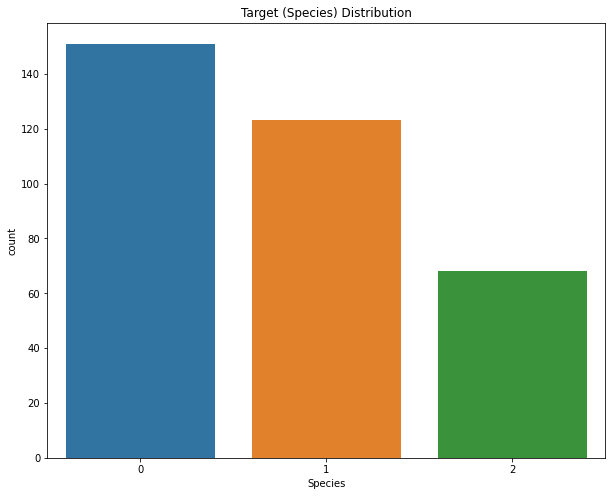

In [9]:
# seeing the distribution of species
plt.figure(figsize = (10,8))
sns.countplot(penguin['Species'])
plt.title('Target (Species) Distribution')
plt.show()

In [10]:
penguin['Species'].value_counts()
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

0    151
1    123
2     68
Name: Species, dtype: int64

the result shows that the species distribution is uneven, while the most common species in the data is Amelie.. later, we have to consider in using **stratified sampling** to our train and test data. 

then, we will see the distribution for 4 independent variables by species...

Text(0.5, 1.0, 'Body Mass by Species')

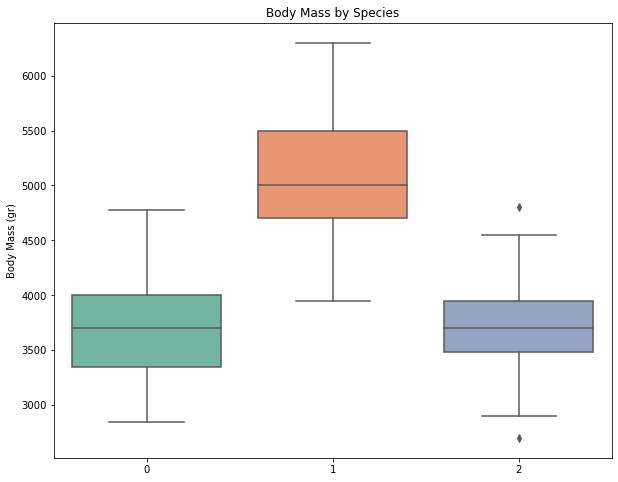

In [11]:
# distribution of the BodyMass by Species
pl = plt.figure(figsize = (10, 8))
pl = sns.boxplot(data = penguin, x = 'Species', y ='BodyMass', palette="Set2")
pl.set_ylabel('Body Mass (gr)')
pl.set_xlabel("")
pl.set_title('Body Mass by Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

- Gentoo are heavier than other two species.
- similar weight between Amelie and Chinstrap. 
- Outliers at Chinstrap.

Text(0.5, 1.0, 'Culmen Length by Species')

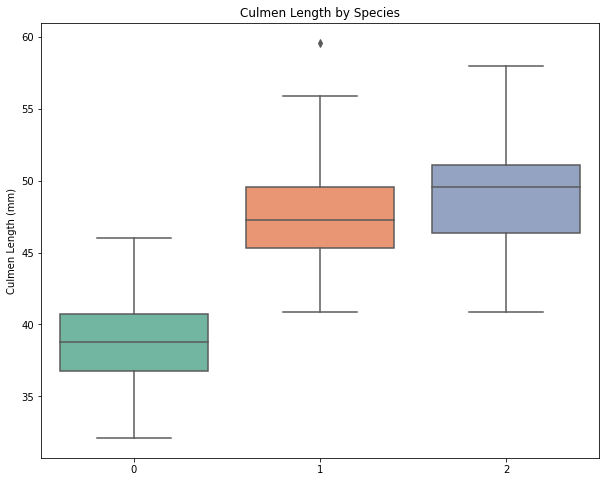

In [12]:
# distribution of the CulmenLength by Species
pl = plt.figure(figsize = (10, 8))
pl = sns.boxplot(data = penguin, x = 'Species', y ='CulmenLength', palette="Set2")
pl.set_ylabel('Culmen Length (mm)')
pl.set_xlabel("")
pl.set_title('Culmen Length by Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

- Amelie has the smallest culmen length among the three species.
- Gentoo and Chinstrap has similar culmen length.
- Outlier in Gentoo.

Text(0.5, 1.0, 'Culmen Depth by Species')

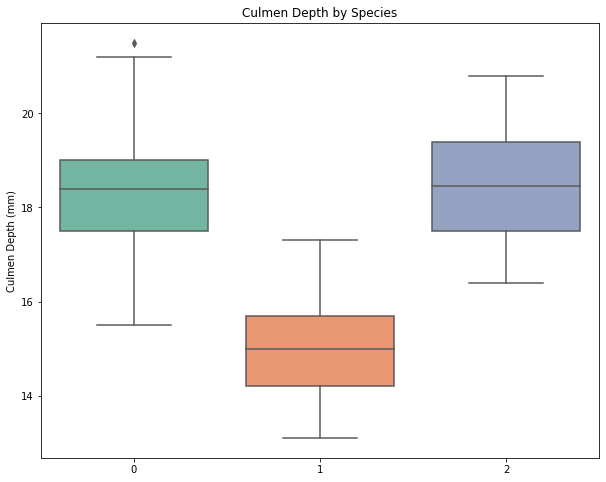

In [13]:
# distribution of the CulmenDepth by Species
pl = plt.figure(figsize = (10, 8))
pl = sns.boxplot(data = penguin, x = 'Species', y ='CulmenDepth', palette="Set2")
pl.set_ylabel('Culmen Depth (mm)')
pl.set_xlabel("")
pl.set_title('Culmen Depth by Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

- Gentoo has the most shallow culmen depth.
- Amelie and Chinstrap are similar in culmen depth.
- Outlier in Amelie.

Text(0.5, 1.0, 'Flipper Length by Species')

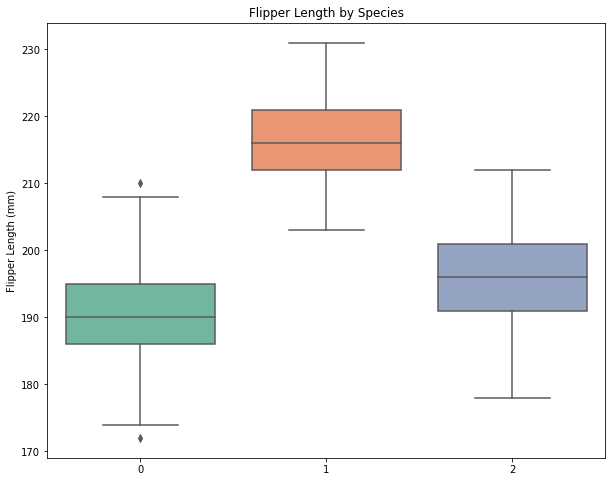

In [14]:
# distribution of the FlipperLength by Species
pl = plt.figure(figsize = (10, 8))
pl = sns.boxplot(data = penguin, x = 'Species', y ='FlipperLength', palette="Set2")
pl.set_ylabel('Flipper Length (mm)')
pl.set_xlabel("")
pl.set_title('Flipper Length by Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

- Gentoo has the largest flipper length.
- Chinstrap is slightly larger than Amelie.
- Outlier in Amelie.

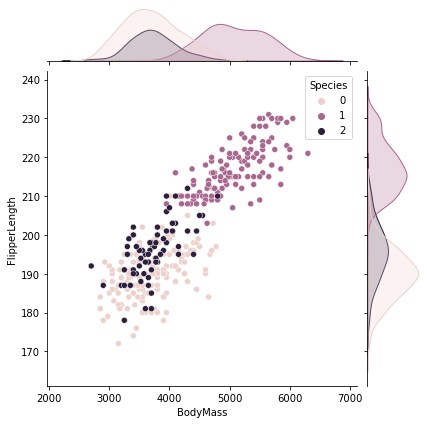

In [15]:
# scatterplot with distributions by colored by species
sp = sns.jointplot(x= 'BodyMass', y = 'FlipperLength', data = penguin, 
                  hue = 'Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

the plot above proving our statement that BodyMass and FlipperLength has very strong positive correlation. then, we can see that Amelie and Gentoo are seperated very well on the flipper length.

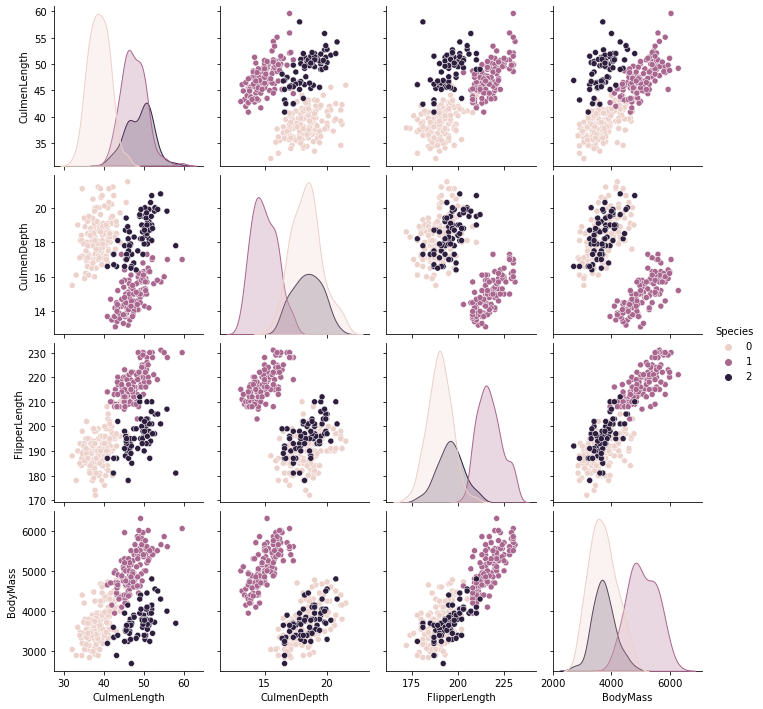

In [16]:
# pairs of scatterplots and distributions
sns.pairplot(penguin, hue='Species')
# 0 =Amelie; 1=Gentoo; 2=Chinstrap

**Summary of the visualization:**
- Gentoo and Chinstraps have similar CulmenLength, while Amelie is smaller than those two.
- Amelie and Chinstraps have similar CulmenDepth, while Gentoo is mostly smaller than those two.
- Amelie and Chinstraps have similar FlipperLength (Chinstraps is slightly larger), while Gentoo is larger than those two.
- Amelie and Chinstraps have similar BodyMass, while Gentoo is larger than those two.

### (15% of points) - 4. Data Preparation 

##### Prepare your data for machine learning and explain the outputs

In [17]:
# get a copy of the data
df = penguin.copy()
df_strat = df.copy()

# list of features
features = list(df.columns)
df = df.reindex(columns=features)
features

['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species']

In [18]:
# import stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
# get target variables and drop from frame
y = df.pop('Species')
X = df.copy()

In [20]:
# define strat sampling parameters
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Loop through each record and perform split by species proportion
for train_index, test_index in split.split(df_strat, df_strat['Species']):
    strat_train_set = df_strat.reindex(train_index)
    strat_test_set = df_strat.reindex(test_index)

In [21]:
strat_test_set['Species'].value_counts() / len(strat_test_set)

0    0.434783
1    0.362319
2    0.202899
Name: Species, dtype: float64

In [22]:
strat_train_set['Species'].value_counts() / len(strat_train_set)

0.0    0.443223
1.0    0.358974
2.0    0.190476
Name: Species, dtype: float64

In [23]:
# copy data
X_train_strat = strat_train_set.copy()
X_test_strat = strat_test_set.copy()

# pop target variables
y_train_strat = X_train_strat.pop('Species')
y_test_strat = X_test_strat.pop('Species')

In [24]:
# scaling the data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector

In [25]:
# define our numeric transformer
X_train_strat[X_train_strat==np.inf] = np.nan
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

# Define our full pipeline
preprocessor = ColumnTransformer(transformers=[ 
    ('num', numeric_transformer, selector(dtype_exclude="object"))
])

In [26]:
# fit then transform training data
X_train = preprocessor.fit_transform(X_train_strat)

# # transform test data
X_test = preprocessor.transform(X_test_strat)

###  (35% of points) - 5. Shortlist promising models

**Now, you can train your models, compare their performances, and display the performance metrics for each models.**   
***`You will get 10 extra points if you correctly compare your model using standard parameters against hyperparameters and provide a clear explanation.`***

In [27]:
# import models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

we will be applying 7 algorithms which are:
    - K Nearest Neighbors
    - Linear SVM (Support Vector Machine)
    - RBF SVM (Radial Basis Function Support Vector Machine)
    - Decision Tree
    - Random Forest
    - Neural Network / Multi Linear Preceptron
    - ADA Boost

In [28]:
# List of model names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

# List of classifiers and parameters
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=4),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier()]

In [29]:
# copy into y train and test data
y_train = y_train_strat.copy()
y_test = y_test_strat.copy()

In [30]:
np.isnan(y_train).any()

True

there is NaN value in our target train data. Hence, we have to modify so the models can be run by filling it with nan_to_num function (fills NaN with zero and infinity with large finite numbers).

In [31]:
y_train = np.nan_to_num(y_train)
np.isnan(y_train).any()

False

Now, we can start the test and choosing the best model.

In [32]:
# iterate over classifiers, fit and return test set scores
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name,':',clf.score(X_test, y_test))
    print('---------')

Nearest Neighbors : 0.9855072463768116
---------
Linear SVM : 0.9710144927536232
---------
RBF SVM : 0.9710144927536232
---------
Decision Tree : 0.9710144927536232
---------
Random Forest : 0.9710144927536232
---------
Neural Net : 0.9855072463768116
---------
AdaBoost : 0.7971014492753623
---------


**2 Best Models**
- Nearest Neighbors: 0.9855
- Neural Net: 0.9855

#### Checking Performance of the 2 Models

First, using cross validation.

In [33]:
clf_nearestN = KNeighborsClassifier(3)
clf_nn = MLPClassifier(alpha=1, max_iter=1000)

clf_nearestN.fit(X_train, y_train)
clf_nn.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [34]:
from sklearn.model_selection import cross_val_score

# cross validation
nearestN_scores = cross_val_score(clf_nearestN, X_train, y_train, cv = 3)  
nn_scores = cross_val_score(clf_nn, X_train, y_train, cv = 3)

# get the score
print("Accuracy of Model with Cross Validation using KNN is:",nearestN_scores.mean() * 100)
print("Accuracy of Model with Cross Validation using Neural Net is:",nn_scores.mean() * 100)

Accuracy of Model with Cross Validation using KNN is: 98.53479853479854
Accuracy of Model with Cross Validation using Neural Net is: 97.80219780219781


The model using KNN has better accuracy with cross validation. Next, we will see the classification metrix.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# KNN
pred01 = clf_nearestN.predict(X_train)
print("KNN Train Result:\n")        
print(f"Accuracy Score: {accuracy_score(y_train, pred01) * 100:.2f}%\n")

pred1 = clf_nearestN.predict(X_test)
clf_report1 = pd.DataFrame(classification_report(y_test, pred1, output_dict=True))
print("KNN Test Result:\n")        
print(f"Accuracy Score: {accuracy_score(y_test, pred1) * 100:.2f}%\n")
print(f"CLASSIFICATION REPORT:\n{clf_report1}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred1)}\n\n")

# Neural Net
pred02 = clf_nn.predict(X_train)
print("MLP Train Result:\n")        
print(f"Accuracy Score: {accuracy_score(y_train, pred02) * 100:.2f}%\n")

pred2 = clf_nn.predict(X_test)
clf_report2 = pd.DataFrame(classification_report(y_test, pred2, output_dict=True))
print("MLP Test Result:\n")        
print(f"Accuracy Score: {accuracy_score(y_test, pred2) * 100:.2f}%\n")
print(f"CLASSIFICATION REPORT:\n{clf_report2}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred2)}\n\n")

KNN Train Result:

Accuracy Score: 99.27%

KNN Test Result:

Accuracy Score: 98.55%

CLASSIFICATION REPORT:
                   0     1          2  accuracy  macro avg  weighted avg
precision   0.967742   1.0   1.000000  0.985507   0.989247      0.985975
recall      1.000000   1.0   0.928571  0.985507   0.976190      0.985507
f1-score    0.983607   1.0   0.962963  0.985507   0.982190      0.985358
support    30.000000  25.0  14.000000  0.985507  69.000000     69.000000

Confusion Matrix: 
 [[30  0  0]
 [ 0 25  0]
 [ 1  0 13]]


MLP Train Result:

Accuracy Score: 99.27%

MLP Test Result:

Accuracy Score: 98.55%

CLASSIFICATION REPORT:
                   0     1          2  accuracy  macro avg  weighted avg
precision   0.967742   1.0   1.000000  0.985507   0.989247      0.985975
recall      1.000000   1.0   0.928571  0.985507   0.976190      0.985507
f1-score    0.983607   1.0   0.962963  0.985507   0.982190      0.985358
support    30.000000  25.0  14.000000  0.985507  69.000000     69.0

Models using KNN is a slightly better fit with the accuracy **over than 98% for the test set**. It also has closer accuration to the train set, so we will be using **K Nearest Neighbor algorithm**. 

Now, we need to find good hyperparameter values using **GridSearchCV**.

In [36]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished


In [37]:
print(grid_search.best_params_)

{'n_neighbors': 9}


In [38]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 98.89%


Once the model is fit, we can find the optimal parameter of K and the best score obtained through GridSearchCV. We can see that the best value of K is 9 and the corresponding accuracy is 98.89 %. Now we'll evaluate our model over the test set:

In [39]:
# checking accuracy to test data
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_test, y_test)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 98.55%


This is slightly better than the parameter we used before. Thus, we will be using this model.

### (3% of points) - 6. Select Your Final Model 

#### You finally have your final model. Write comments to justify your final model

In [40]:
df = penguin.copy()
y = df.pop('Species')

In [41]:
# define our numeric transformer
df[df==np.inf] = np.nan
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

# define modeling
preprocessor = ColumnTransformer(transformers=[ 
    ('num', numeric_transformer, selector(dtype_exclude="object"))
])

# define our full pipeline
clf_knn_final = Pipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors = 9))
])

In [42]:
clf_knn_final.fit(df, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027708963D30>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=9))])

In [43]:
y_hat = clf_knn_final.predict(X = df)
accuracy_score(y_true = y, y_pred=y_hat)

0.9883040935672515

We got 98.83% test accuracy, +1.74%  more than  97.14% on overall data!

***Verified by,***
   
[Noviyanti TM Sagala] (D6464) and sent to Department/Program on 04 04, 2022    